<a href="https://colab.research.google.com/github/saharnazb/DataAnalytics/blob/master/PredictiveAnalytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction to Data Analytics**
> ### Saharnaz Babaei-Balderlou
---



## Predictive Analytics: Regression
\\

**Reading for this session: [Chapter 3](https://www.statlearning.com/)**


<img src="https://images.squarespace-cdn.com/content/v1/5ff2adbe3fe4fe33db902812/8b373fbe-d1b4-4351-b803-0d3cd5bba1b0/ISLP_cover.png?format=750w" alt="picture" width="275" />

# **Recap**

<details>
  <summary>What is Supervised/Unsupervised Learning?</summary>

  Supervised Learning:
  * Observations are classified into predictor and response variables;
  * Primary goal is model relationships between the predictor and response variables;
  * Relationships can be used for prediction or for inference


  Unsupervised Learning:
  * Each observation is a vector of variables, but they are not classified as predictors and responses;
  * Primary goal is to find structure in the multivariable sata set;
  * One important technique is clustering, which seeks to find distinct groups of units or variables in the data set
</details>

<details>
  <summary>What is Predictive Analytics?</summary>
  Predictive Data Analytics encompasses the business and data process and computational models that enable a business to make data-driven decisions (AKA as supervised learning)
</details>

<details>
  <summary>Who uses Predictive Analytics?</summary>
  Everyone can use it in every industry with any size (business, medicine, astrophysics, public policy, …)
</details>

<details>
  <summary>Some example applications</summary>
  Price prediction, fraud detection, dosage prediction, risk assessment, propensity modelling, diagnosis, document classification, …
</details>

<details>
  <summary>What are common steps, workflows, and processes of most predictive analytics projects?</summary>
  goal, data, transform, analyze, deploy
</details>

<details>
  <summary>Why do we learn regression?</summary>
  prediction, exploring associations, extrapolation, causal inference
</details>





### **Steps of Data Storytelling**
<img src="https://assets-global.website-files.com/5dcc6210881da483dfe6cda8/61397b0b5afecb12a7127853_lego_datastory_rev1000.png" alt="picture" width="500" />

1. **Data collection:** You accumulate data and information on something to measure and understand its performance and behaviors.
2. **Data preparation:** (AKA data wrangling, data munging or data remediation) You convert a raw data into a usable form, retrieve, aggregate, merge, cleanse, organize, and transform the data so it's ready to be analyzed.
3. **Data visualization:** You visualize the data by creating graphic depictions of the informationto simplify monitoring and understanding what's happening.
4. **Data analysis:** You examine the data for insights tailored to the interest of a specific audience.
5. **Data storytelling:** You explain derived insights through engaging stories and visual elements to foster a connection and encourage transformative action. [1](https://www.effectivedatastorytelling.com/post/a-deeper-dive-into-lego-bricks-and-data-stories)

**Note:** *Ethical Considerations in Data Analytics*


> * In the ever-expanding field of data analytics, where the capacity for data gathering, retrieval, and analysis is growing, there is a critical need for maintaining ethical practices.
> * The pace of technological advancement often surpasses the speed at which regulations and corporate policies can adapt, leading to an ``ethics gap'' where the boundaries of legality and morality may diverge.
> * Data analysts must be vigilant about the ethical dimensions of their work, recognizing that the ability to perform certain actions doesn't automatically suggest that those actions are ethically justified.
> * Analysts are integral to the ethical dialogue and must uphold a high standard of ethics in their professional conduct, aligning their actions with established ethical norms.

### **Key Phrases/Concepts**

| Business/Statistics | Machine Learning | Definition |
|---------------------|------------------|------------|
| Regression/Classification; Prediction/Forcasting | Supervised Learning | A type of algorithm that learns from labeles training data, helping predict outcomes for unseen data. |
| Association/Pattern Identification | Unsupervised Learning |  |
| Variable | Feature | Any characteristic, number, or quantity that can be measured or quantified |
| Equation | Model | The system or algorithm that makes predictions based on data |
| Fitting  | Training | learning the relationship between features and outcomes on a given dataset |
| Method/Procedure | Algorithm | A set of rules or instructions given to a system to help it learn from data (OLS, MLE, etc) |
| Goodness-of-Fit | Accuracy | Proportion of correct predictions made by a model/ a measure of how well a model's predicted values match the observed (true) values |
| Outliers | Outliers | Data point that are significantly different from others in the dataset |






# **Motivating Examples**

Which of the following questions are considered as predictive analytics problems?

1. Can you forcast what would be the demand for the product next quarter?
2. A pharma company wants to determine if a particular disease phenotype is assosciated  with hypertension and type II diabetes!
3. From the mock test, can you predict what would be the expected SAT score of a student?
4. Bank executives want to identify if women customers with salary account would be interested in a car loan.
5. A real estate agent predicts the value of a house to go on the market.

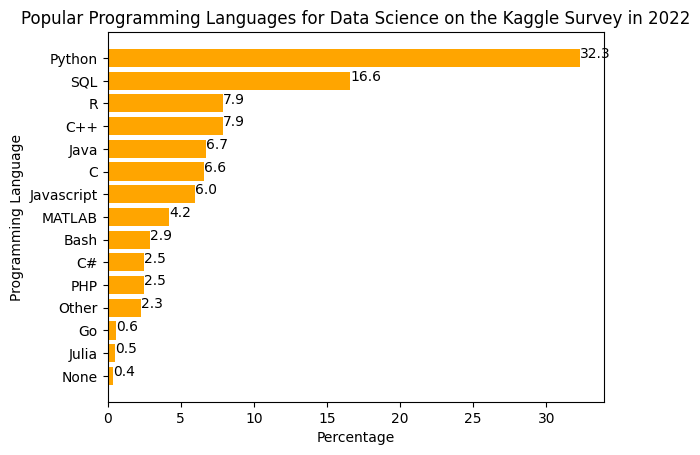

In [ ]:
import matplotlib.pyplot as plt

# Data from the image
languages = ['Python', 'SQL', 'R', 'C++', 'Java', 'C', 'Javascript', 'MATLAB', 'Bash', 'C#', 'PHP', 'Other', 'Go', 'Julia', 'None']
usage = [32.3, 16.6, 7.9, 7.9, 6.7, 6.6, 6.0, 4.2, 2.9, 2.5, 2.5, 2.3, 0.6, 0.5, 0.4]

# Create a horizontal bar chart
plt.barh(languages[::-1], usage[::-1], color='orange')  # Reverse the lists to match the order in the image

# Set the title and labels
plt.title('Popular Programming Languages for Data Science on the Kaggle Survey in 2022')
plt.xlabel('Percentage')
plt.ylabel('Programming Language')

# Add the data labels
for index, value in enumerate(usage[::-1]):
    plt.text(value, index, str(value))

# Show the plot
plt.show()

# **House Value Prediction: Boston Data**

We may wish to construct a model that predicts median value (`mdev`) based on the other variables in the dataset.

In [ ]:
#!pip install numpy statsmodels matplotlib # typically done in a command-line interface or a Jupyter notebook cell prefixed with ! to denote a shell command.
# Import required packages
import numpy as np # used for numerical operations in Python
import pandas as pd # used for data manipulation and analysis
import matplotlib.pyplot as plt # used for creating static, interactive, and animated visualizations in Python
from matplotlib.pyplot import subplots # This direct import is handy if you're going to use subplots frequently in your code and prefer not to prefix it with plt. each time you call it.
import seaborn as sns # a Python visualization library based on matplotlib that provides a high-level interface for drawing attractive statistical graphics
import statsmodels.api as sm # used for estimating and testing statistical models
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF # used to quantify the severity of multicollinearity in an ordinary least squares regression analysis
from statsmodels.stats.anova import anova_lm # used for performing ANOVA (Analysis of Variance)
from sklearn.linear_model import LinearRegression # used for performing linear regression
from sklearn.model_selection import train_test_split # used for splitting datasets into training and testing sets
from sklearn.metrics import mean_squared_error # used for calculating the mean squared error of prediction
from sklearn.metrics import confusion_matrix # used for evaluating the accuracy of a classification


#!pip install ISLP
from ISLP import load_data # used for loading data from ISLP package
from ISLP.models import(ModelSpec as MS, summarize, poly) # used for model specification, summarization, and polynomial feature transformation respectively

In [ ]:
Boston = load_data("Boston")
Boston.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'lstat', 'medv'],
      dtype='object')

# **List of Variables:**
`crim`: per capita crime rate by town

`zn`: proportion of residential land zoned for lots over 25,000 sq. ft.

`indus`: proportion of non-retail business acres per town

`chas`: Charles River dummy variable (=1 if tract bounds river; 0 otherwise)

`nox`: Nitrogen Oxides concentration (parts per 10 million)

`rm`: average number of rooms per dwelling

`age`: proportion of owner-occupied units built prior to 1940

`dis`: weighted mean of distances to five Boston employment centers

`rad`: index of accessibility to radial highways

`tax`: full-value property-tax rate per $10,000

`ptratio`: pupil-teacher ratio by town

`lstat`: Proportion of population that is lower status

`medv`: median value of owner-occupied homes in $1000s

Let's assign `medv` as the *response variable* and the other variables as *predictor variables*.
* This model could be used to **predict** future (or unobserved) responses based on the predictors
> * If built a new suburb with a set of predictors, what would the model predict to be the median value of homes in the new suburb?

* Some models can also be used for inference to understand the relationship between the response and the predictors.
> * If we reduced the pollution level in a particular suburb by half its current amount, what would the effect be on median values?
> * If we added access to the radial highways, what would the model estimate the effect to be the median value of homes in the suburb?


\
# **Simple Linear Regression (SLR)**

SLR is a way for predicting a response $Y$ on the basis of a single predictor variable $X$.
* $Y$ could be numeric, binary/categorical (coded as integers)

Easily expandable to Multiple Linear Regression where there exist multiple predictors $X_i$.

We model a linear relationship as
\begin{equation}
\hat{Y} = \hat{\beta_{0}} + \hat{\beta_{1}}X \;\;\;\;\;\;\;   (1)
\end{equation}

* We often say that we are regressing $Y$ onto $X$.

In equation (1), $\hat{\beta_{0}}$ and $\hat{\beta_{1}}$ represent the intercept and the slope in the linear model, respectively.

Once we have used our **training data** to produce estimates $\hat{\beta_{0}}$ and $\hat{\beta_{1}}$ for the model coefficients, we can predict future house values on the basis of a particular value of predictor variables. More on this to come.

# **Estimating the Cofficients**

We can use equation (1) to make predictions, but we need to "fit the model" and estimate the coefficients.

We investivate the Boston data set, which records `medv` (median house value) for 506 neighborhoods around Boston.


## **Explore the data**

<details>
  <summary>What types of exploratory data analysis can we do?</summary>

* histogram
* barplot
* scatterplot
* a map of Boston colored with a scale of average home price by neighborhood.
</details>

Text(0.5, 1.0, 'Exploring the Boston Data')

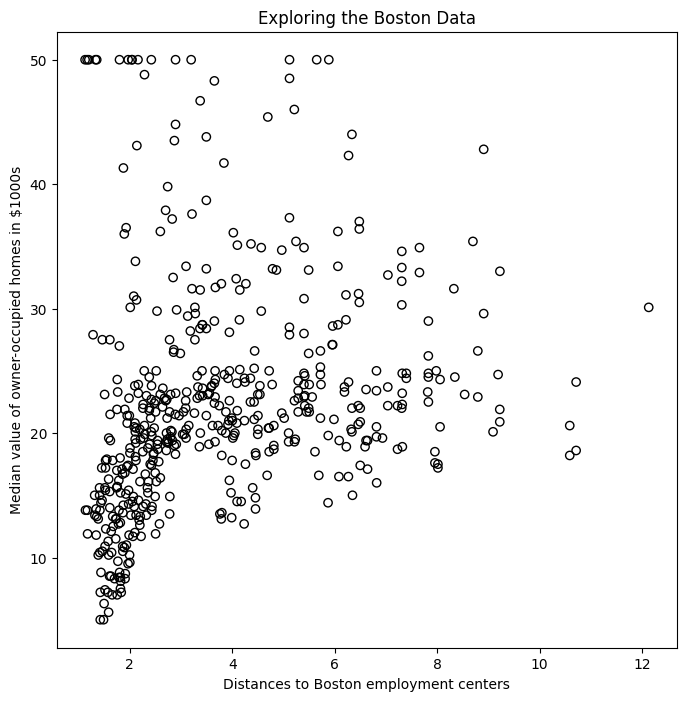

In [ ]:
fig, ax = subplots(figsize=(8, 8))
ax.scatter(Boston['dis'], Boston['medv'], color='black', marker='o', facecolors='none')
ax.set_xlabel("Distances to Boston employment centers")
ax.set_ylabel("Median value of owner-occupied homes in $1000s")
ax.set_title("Exploring the Boston Data")
#fig.savefig("medv_dis_Scat", dpi=400)

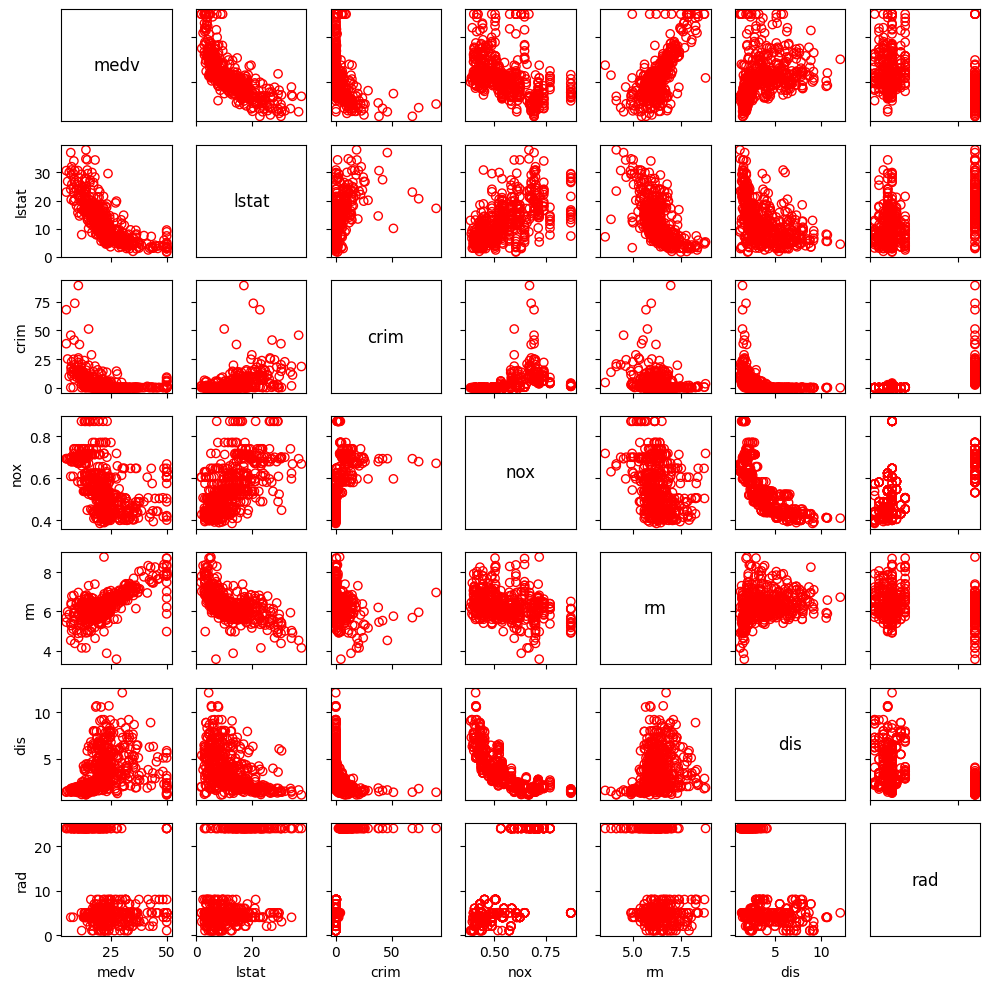

In [ ]:
variables = ['medv', 'lstat', 'crim', 'nox', 'rm', 'dis', 'rad']
n = len(variables)

fig, axs = subplots(nrows=n, ncols=n, figsize=(10, 10))  # Adjust the figsize to fit your screen

# Iterate over rows
for i in range(n):
    # Iterate over columns
    for j in range(n):
        # If we're on the diagonal, we write the variable name
        if i == j:
            axs[i, j].text(0.5, 0.5, variables[i], horizontalalignment='center', verticalalignment='center', fontsize=12)
            axs[i, j].set_xticks([])
            axs[i, j].set_yticks([])
        # If we're not on the diagonal, we create a scatter plot
        else:
            axs[i, j].scatter(Boston[variables[j]], Boston[variables[i]], color='red', marker='o', facecolors='none')
            if i < n - 1:  # Hide x-axis labels for all but the bottom plots
                axs[i, j].set_xticklabels([])
            if j > 0:  # Hide y-axis labels for all but the first column plots
                axs[i, j].set_yticklabels([])
            if j == 0:  # Only set y-label for the first column
                axs[i, j].set_ylabel(variables[i])
            if i == n - 1:  # Only set x-label for the bottom row
                axs[i, j].set_xlabel(variables[j])

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

#my_figure.savefig('scatplots.png')

\
## **Estimating the Coefficients**
Let's play a [game](https://sophieehill.shinyapps.io/eyeball-regression/) first. Can Can you guess the intercept and slope of the line of best fit?!

Let $\hat{y_i} = \hat{\beta_0} + \hat{\beta_1}x_i$ be the prediction of $Y$ based on the $i^{th}$ value of $X$.

* *Goal:* estimate the $\hat{\beta_0}$ (aka intercept) and $\hat{\beta_1}$ (aka slope) such that the resulting line goes through "right in the middle" of the data points.
Define $e_i = y_i - \hat{y_i}$ known as the $i^{th}$ residual, or the error where $y_i$ is the actual value of the response variable, and $\hat{y_i}$ is the model's prediction.




The Residiuals Sum of Squared (RSS) is defined as

\begin{equation}
\begin{aligned}
RSS &= e^2_1 + \dots + e^2_n \\
&= \Sigma_{i=1}^{n}(y_i - \hat{\beta_0}\hat{\beta_1}x_i)^2
\end{aligned}
\end{equation}

Using calculus, one can show that the minimizing values are

$$\hat{\beta_1} = \frac{\Sigma_{i=1}^n (x_i - \bar x)(y_i - \bar y)}{\Sigma_{i=1}^{n} (x_i - \bar x)}$$

$$\hat \beta_0 = \bar y - \hat \beta_1 \bar x$$


## **Goodness of Fit**

\
$R^2$ is the proportion of variance explained — and it always takes on a value between 0 and 1, independent of the scale of Y.

$$R^2 = \frac{TSS - RSS}{TSS} = 1 - \frac{RSS}{TSS}$$

where $TSS = \Sigma_i (y_i - \bar y)$ is the total sum of squares.

* $TSS$ measures the total variance in the response $Y$ , and can be thought of as the amount of variability inherent in the response before the regression is performed.
* $RSS$ measures the amount of variability that is left unexplained after performing the regression.
* $R^2$ measures the proportion of variability in $Y$ that can be explained using $X$.


> * An $R^2$ statistic that is close to 1 indicates that a large proportion of the variability in the response has been explained by the regression.
> * A number near 0 indicates that the regression did not explain much of the variability in the response.
> * This might occur because the linear model is wrong, or the inherent variability in response is high, or both.

* Additional benefit of regression: coefficients have meaning! (prediction vs. interpretation)

### **Example**

We investigate the `Boston` data set, which records `medv` (median house value) for 506 neighborhoods around Boston.

**Goal:** predict `medv` using 13 predictors such as `rm` (average number of rooms per house), `age` (average age of houses), and `lstat` (percent of households with low socioeconomic status).

We will do a linear regression and then will extend it to multiple linear regression.

In [ ]:
# Required packages are loaded earlier. Rememebr to run the cell for libraries and pakcages
# Boston Data is loaded earlier. Do not forget to run the associated cell.

X = sm.add_constant(Boston['lstat'])  # add a column of ones to act as an intercept term in the linear model
y = Boston['medv'] #assign `medv` as response/dependent variable in the linear regression

result_1 = sm.OLS(y, X).fit() # creates OLS regression model with y and X. Then fits and assigns the fitted model to `result_1`

# Regression output
print(result_1.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Tue, 06 Feb 2024   Prob (F-statistic):           5.08e-88
Time:                        23:11:24   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.5538      0.563     61.415      0.0

The code performs a linear regression analysis to understand the relationship between the lower status population percentage (`lstat`) and the median value of homes (`medv`) in the Boston area, including statistical assessments of the model's accuracy and reliability.

**Interpretation:** one unit change in X is associated with a 0.95 decrease in Y.

<details>
<summary> Does the interpretation make sense for medv and lstat?</summary>

Yes, the interpretation makes sense in the context of the relationship between medv (median value of owner-occupied homes in $\$1000$s) and `lstat` (percentage of lower status of the population) based on the data from the Boston housing dataset. The statement "one unit change in X (where X represents `lstat`) is associated with a 0.95 decrease in Y (where Y represents `medv`)" implies that as the percentage of lower status population in an area increases by 1%, the median value of owner-occupied homes in that area is expected to decrease by $950 (since medv is measured in thousands of dollars).

This interpretation aligns with intuitive and empirical observations that areas with a higher percentage of lower-income residents tend to have lower property values. The negative coefficient (-0.95) indicates an inverse relationship between lstat and medv: as lstat increases, medv tends to decrease, reflecting the socio-economic factors that influence housing prices. The magnitude of the coefficient gives a quantifiable measure of this relationship, providing valuable insight into how socio-economic status impacts housing values in the Boston area.
</details>

<details>
<summary> Always check the mean Y and X when you interpret coefficients to get a sense of their magnitude. </summary>

A change of $\$950$ (since `medv` is measured in $\$1000$s, and a 0.95 decrease translates to $\$950$) against an average home value of approximately $\$22,533$ can be considered significant in practical terms. This effect size accounts for approximately 4.2% of the mean value of medv.
Considering the standard deviation of medv is $\$9,197$, the effect size of $950 is about 10.3% of the standard deviation. This comparison shows that the effect, while not overwhelming, is non-trivial given the variability in home values.
</details>

In [ ]:
# Summary Statistics
summary_statistics_X = Boston['lstat'].describe()
summary_statistics_Y = Boston['medv'].describe()

# Print summary statistics for X and Y
print("Summary Statistics for X (lstat):")
print(summary_statistics_X)

print("\nSummary Statistics for Y (medv):")
print(summary_statistics_Y)

# Summary output
summarize(result_1, conf_int=True)

Summary Statistics for X (lstat):
count    506.000000
mean      12.653063
std        7.141062
min        1.730000
25%        6.950000
50%       11.360000
75%       16.955000
max       37.970000
Name: lstat, dtype: float64

Summary Statistics for Y (medv):
count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: medv, dtype: float64


,coef,std err,t,P>|t|,[0.025,0.975]
const,34.5538,0.563,61.415,0.0,33.448,35.659
lstat,-0.9500,0.039,-24.528,0.0,-1.026,-0.874


If you prefer using `scikit-learn`, the code would look like this:

In [ ]:
# Prepare the features and target
X = Boston[['lstat']]  # scikit-learn expects X to be a DataFrame or 2D array-like
y = Boston['medv']

# Create a linear regression object
lm = LinearRegression()

# Fit the model
lm.fit(X, y)

# Print out the coefficients
print(f'Intercept: {lm.intercept_}')
print(f'Coefficients: {lm.coef_[0]}')



Intercept: 34.5538408793831
Coefficients: -0.9500493537579906


In [ ]:
# Make predictions using the model
predictions = lm.predict(X)

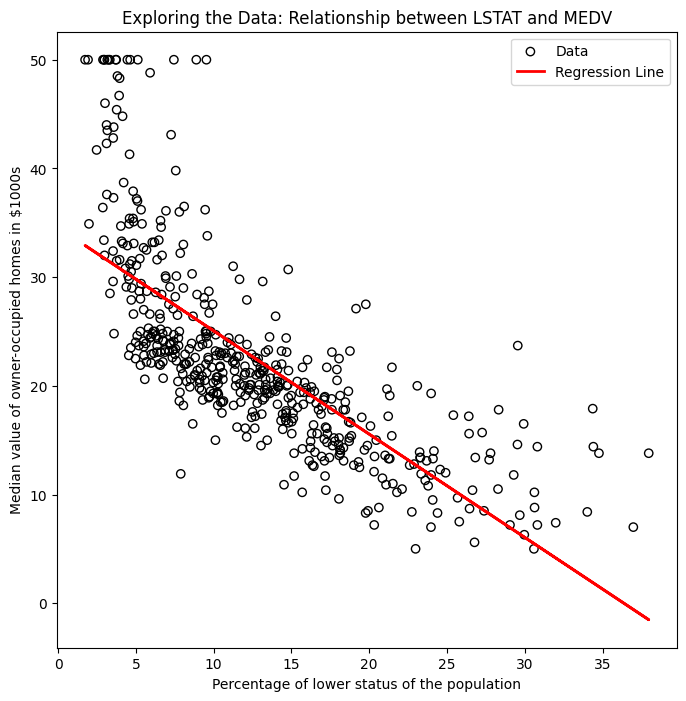

In [ ]:
# Create scatter plot
fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(Boston['lstat'], Boston['medv'], label='Data', color='black', marker='o', facecolors='none')

# Plot the regression line
ax.plot(Boston['lstat'], predictions, color="red", lw=2, label='Regression Line')

# Set labels and title
ax.set_xlabel("Percentage of lower status of the population")
ax.set_ylabel("Median value of owner-occupied homes in $1000s")
ax.set_title("Exploring the Data: Relationship between LSTAT and MEDV")

# Add legend
ax.legend()

# Optionally save the figure
#fig.savefig("lstat_medv_regression.png", dpi=400)

# Show plot
plt.show()

# **Let's Talk About Prediction**

What does the model predict for the median home value in a neighborhood with `lstat=10`?

In supervised learning, you want to split your data into traning and test groups. This is done to prevent *overfitting*.

In [ ]:
# Create a training and test sample
# Here we use train_test_split from scikit-learn which does the same as sample() in R

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=63) # random_state sets the seed for the random number generator to split the data randomly into training and testing sets

# Fit the model
trained_model = LinearRegression().fit(X_train, y_train)

# Predict for a single value
# Here we create a DataFrame with the single value for prediction as required by scikit-learn
single_prediction = trained_model.predict(pd.DataFrame({'lstat': [10]}))  # Predicting for lstat value of 10
print(single_prediction)

# If you want to include the intercept and coefficient manually
intercept = trained_model.intercept_
coefficient = trained_model.coef_[0]
manual_prediction = intercept + coefficient * 10
print(manual_prediction)


[25.06640109]
25.066401086298246


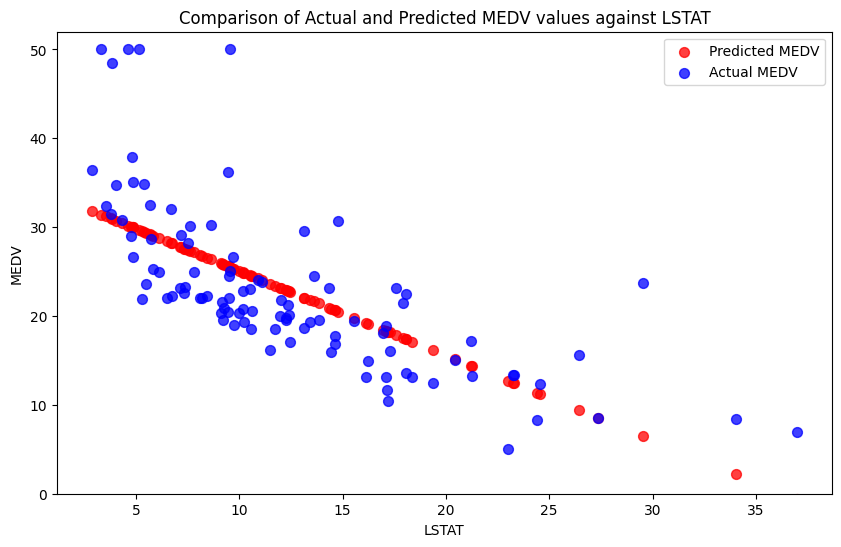

In [ ]:
# Predict for all lstat in the test sample
preds = trained_model.predict(X_test)

# Plot predicted (red) and actual medv (blue)
plt.figure(figsize=(10, 6))

# Plot predicted values
plt.scatter(X_test['lstat'], preds, color='red', label='Predicted MEDV', s=50, alpha=0.75) # specific size (s=50), and semi-transparency (alpha=0.75)

# Plot actual values
plt.scatter(X_test['lstat'], y_test, color='blue', label='Actual MEDV', s=50, alpha=0.75)

# Set labels and title
plt.xlabel('LSTAT')
plt.ylabel('MEDV')
plt.ylim(0, 52)
plt.title('Comparison of Actual and Predicted MEDV values against LSTAT')

# Add a legend
plt.legend()

# Show plot
plt.show()

# **How good is the model?**
We use **Mean Squared Error (MSE)** to evaluate the model.


In [ ]:
# Calculate the squared errors
errorsq = (y_test - preds) ** 2

# Compute the mean squared error
mse = np.mean(errorsq)

print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 41.72930385296554


# **Can we improve on the model?**
 **Let's add another variable**


In [ ]:
# Define predictors and response variable
X = Boston[['lstat', 'rm']]  # Using 'lstat' and 'rm' as predictors
y = Boston['medv']

# Split the data into training and testing sets (let's say 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=63)

# Fit the model with 'lstat' and 'rm' as predictors
model = LinearRegression().fit(X_train, y_train)

# Predict for the test set
preds = model.predict(X_test)

# Calculate MSE
mse = mean_squared_error(y_test, preds)

print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 32.56384978803744


# **Binary Outcome: LPM**
## **Example 1:**

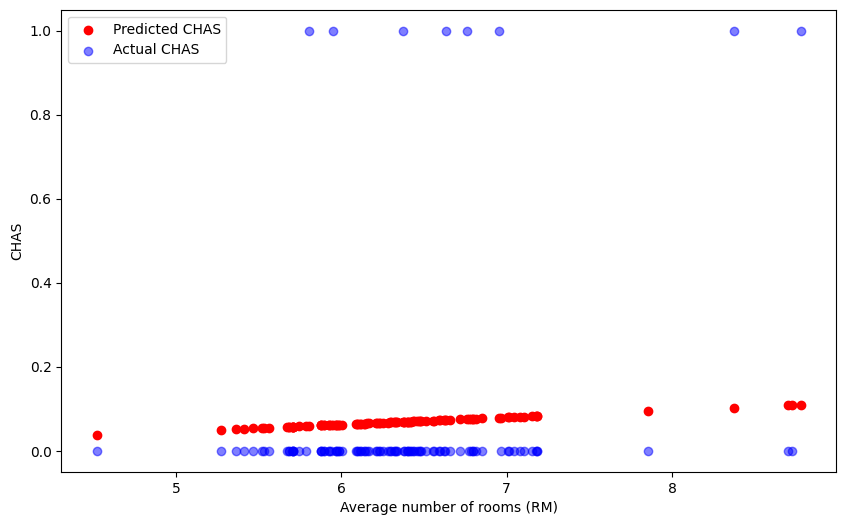

[[56 38]
 [ 3  5]]
Percentage Correct: 0.5980392156862745


In [ ]:
# Split the data (assuming this needs to be done as 'training' and 'test' are not predefined)
X = Boston[['rm']]  # Predictor
y = Boston['chas']  # Response variable, for linear regression example

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=63)

# Fit the model
model = LinearRegression().fit(X_train, y_train)

# Predict for the test set
preds = model.predict(X_test)

# Plotting predicted vs actual
plt.figure(figsize=(10, 6))
plt.scatter(X_test['rm'], preds, color='red', label='Predicted CHAS')
plt.scatter(X_test['rm'], y_test, color='blue', alpha=0.5, label='Actual CHAS')
plt.xlabel('Average number of rooms (RM)')
plt.ylabel('CHAS')
plt.legend()
plt.show()

# Converting predictions to binary using mean of CHAS as threshold
mean_chas = y.mean()
make_pred = (preds > mean_chas).astype(int)

# Confusion Matrix
cm = confusion_matrix(y_test, make_pred)
print(cm)

# Calculating percentage correct
percent_correct = np.trace(cm) / np.sum(cm)
print("Percentage Correct:", percent_correct)

# **Example 2:**

Does the employment anti-discrimination policies affect the decision of employee retention?

# **Announcements**
* Problem Set 2 is available on course page in GitHub
> * One question is group activity. Submit as a group.
*

# **References**
[1] https://www.effectivedatastorytelling.com/post/a-deeper-dive-into-lego-bricks-and-data-stories